# Exercício 3 - Computação Científica II 2019.2
> Gil Miranda<br>
> Repo: https://github.com/mirandagil/university-courses/tree/master/comp-cientifica-II-2019-2<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---
### Exercício 1

In [2]:
## F: Função derivada da função que queremos encontrar
## t0: tempo inicial
## y0: ponto inicial
## ts: range de tempo
## p: parametros particulares de cada modelo
def rk_4(F, y0, ts, p = 0):
    ys = [y0]
    t = ts[0]
    h = ts[1] - ts[0]
    for tnext in ts:
        k1 = h*F(t, ys[-1], p)
        k2 = h*F(t + h/2, ys[-1] + k1/2, p)
        k3 = h*F(t + h/2, ys[-1] + k2/2, p)
        k4 = h*F(t + h, ys[-1] + k3)
        ynext = ys[-1] + (k1/6+k2/3+k3/3+k4/6)
        ys.append(ynext)
        t = tnext
    return np.array(ys[:-1])

In [3]:
def dif_eq(t, u, p=0):
    return np.array([1.2*u[0] - 0.6*u[0]*u[1], 0.8*u[1]+0.3*u[0]*u[1]])

u0 = [2,1]
ts = np.arange(0,2,0.1)

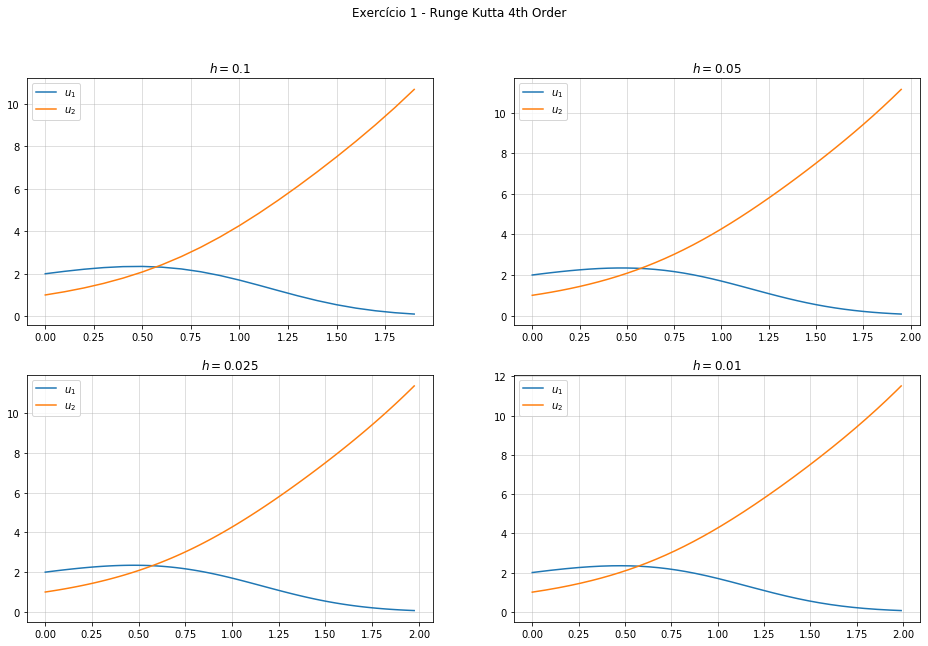

In [4]:
hs = [0.1,0.05,0.025,0.01]
ts = [np.arange(0,2,h) for h in hs]

ys_rk = []
for t in ts:
    ys_rk.append(rk_4(dif_eq, u0, t))

    
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (16,10))
fig.suptitle('Exercício 1 - Runge Kutta 4th Order')
axes = [ax1, ax2, ax3, ax4]
for (a, y, t, h) in zip(axes, ys_rk, ts, hs):
    a.plot(t, y)
    a.set_title('$h = ' + str(h) + '$')
    a.grid(alpha = 0.5)
    a.legend(['$u_1$','$u_2$'])
plt.show()

---
### Exercício 2

In [5]:
def dif_eq2(t, u, p = 0):
    return 10*np.e**(-((t-2)**2/(2*(0.075)**2))) - 0.6*u

#### Runge Kutta 2/3 - Utilizando ordem 3 como solução exata

In [6]:
## F: Função derivada da função que queremos encontrar
## t0: tempo inicial
## y0: ponto inicial
## ts: range de tempo
## p: parametros particulares de cada modelo
def rk_23(F, y0, ts, p = 0):
    ys = [y0]
    ys_til = [y0]
    t = ts[0]
    h = ts[1] - ts[0]
    for tnext in ts:
        k1 = F(t, ys[-1], p)
        k2 = F(t + h/2, ys[-1] + k1/2, p)
        k3 = F(t + 3*h/4, ys[-1] + 3*h*k2/4, p)
        k4 = F(t + h, ys[-1] + h/9 * (2*k1 + 3*k2 + 4*k3))
        ynext = ys[-1] + h/9 * (2*k1+3*k2+4*k3)
        ynext_til = ys[-1] + h/24 * (7*k1+6*k2+8*k3+3*k4)
        ys.append(ynext)
        ys_til.append(ynext_til)
        t = tnext
    return np.array(ys[:-1]),np.array(ys_til[:-1])

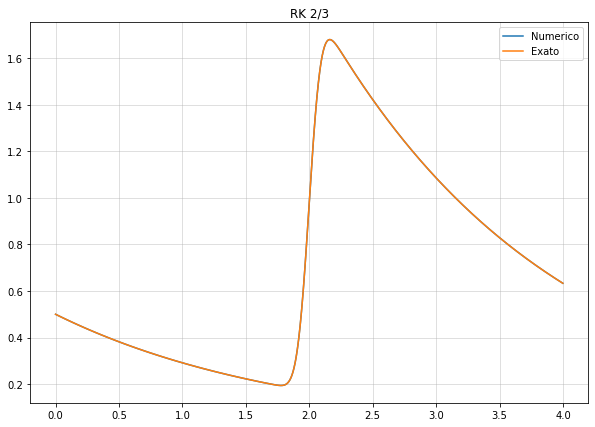

In [7]:
ts = np.arange(0,4,0.001)
u0 = 0.5
ys, sol = rk_23(dif_eq2, u0, ts)
plt.figure(figsize=(10,7))
plt.plot(ts, ys, label='Numerico')
plt.plot(ts, sol, label='Exato')
plt.grid(alpha=0.5)
plt.title('RK 2/3')
plt.legend()
plt.show()

#### Runge Kutta 2/3 Adaptativo

In [8]:
## F: Função derivada da função que queremos encontrar
## t0: tempo inicial
## y0: ponto inicial
## ts: range de tempo
## p: parametros particulares de cada modelo
def rk_23_adp(F, y0, ts, h, tol = 1e-3, p = 0):
    hlim = [1e-3, h]
    ys = [y0]
    ys_til = [y0]
    t = [ts[0]]
    if t[-1] + h > ts[-1]: h = ts[-1] - t[-1] ## Garantir que o grid de tempo não passe de tf
    while t[-1] < ts[-1]:
        k1 = F(t[-1], ys[-1], p)
        k2 = F(t[-1] + h/2, ys[-1] + k1/2, p)
        k3 = F(t[-1] + 3*h/4, ys[-1] + 3*h*k2/4, p)
        k4 = F(t[-1] + h, ys[-1] + h/9 * (2*k1 + 3*k2 + 4*k3))
        ynext = ys[-1] + h/9 * (2*k1+3*k2+4*k3)
        ynext_til = ys[-1] + h/24 * (7*k1+6*k2+8*k3+3*k4)
        err = abs(ynext_til - ynext)
        if err <= tol:
            h = h*(tol/err)**(1/3)
            ys.append(ynext)
            ys_til.append(ynext_til)
            tnext = t[-1] + h
            t.append(tnext)
        else:
            h = h/2
    return np.array(ys),np.array(ys_til), t

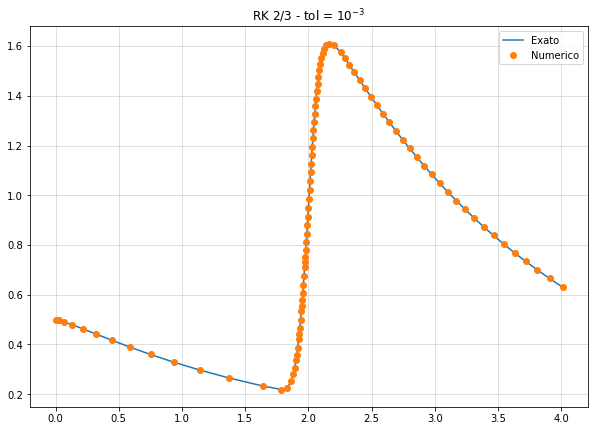

93

In [9]:
u0 = 0.5
ys, sol, ts = rk_23_adp(dif_eq2, u0, ts = [0,4], h = 0.01)
plt.figure(figsize=(10,7))
plt.plot(ts, sol, label='Exato')
plt.plot(ts, ys, 'o', label='Numerico')
plt.grid(alpha=0.5)
plt.title('RK 2/3 - tol = $10^{-3}$')
plt.legend()
plt.show()
len(ys)

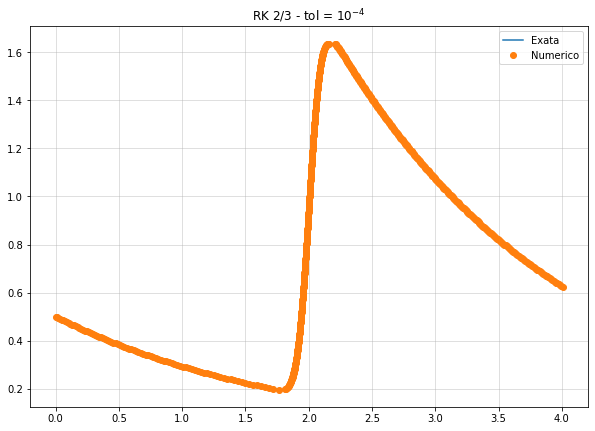

820

In [10]:
u0 = 0.5
ys, sol, ts = rk_23_adp(dif_eq2, u0, ts = [0,4], h = 0.01, tol = 1e-4)
plt.figure(figsize=(10,7))
plt.plot(ts, ys, label = 'Exata')
plt.plot(ts, ys, 'o', label='Numerico')
plt.grid(alpha=0.5)
plt.title('RK 2/3 - tol = $10^{-4}$')
plt.legend()
plt.show()
len(ys)

Podemos ver que a $tol = 10^{-3}$ gerou 93 pontos, enquanto $tol = 10^{-4}$ gerou 820 pontos

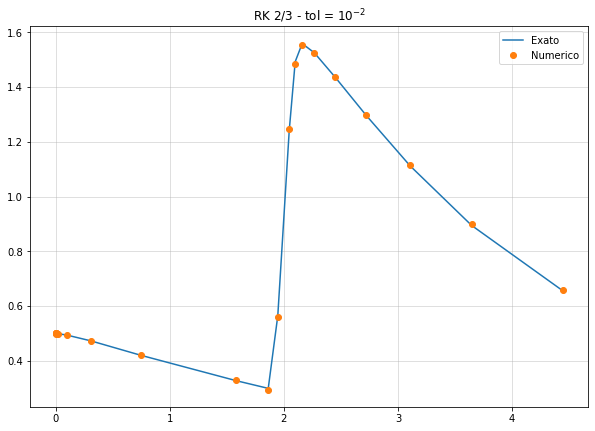

21

In [11]:
### Bonus: tol = 1e-2
u0 = 0.5
ys, sol, ts = rk_23_adp(dif_eq2, u0, ts = [0,4], h = 1e-14, tol = 1e-2)
plt.figure(figsize=(10,7))
plt.plot(ts, sol, label='Exato')
plt.plot(ts, ys, 'o', label='Numerico')
plt.grid(alpha=0.5)
plt.title('RK 2/3 - tol = $10^{-2}$')
plt.legend()
plt.show()
len(ys)

---
### Exercício 3

In [12]:
##### Vectorized forward euler
### Input:  F -> Differential equation;
###         y0 -> list or scalar for initial condition;
###         ts -> list of points on time to evaluate the equation;
###         p -> list or scalar for parameters for F, default is set to 0 if F has no extra parameters;
### Output: ys -> numpy array with all solutions for each step t, ys is a Matrix
##### Gil Miranda - last revision 03/09/2019
def f_euler(F, y0, ts, p = 0):
    ys = np.array([y0])  
    h = ts[1]-ts[0]
    for tnext in ts[1:]:
        ynext = ys[-1] + F(tnext, ys[-1], p)*h
        ys = np.vstack((ys,ynext))
        t = tnext
    return ys

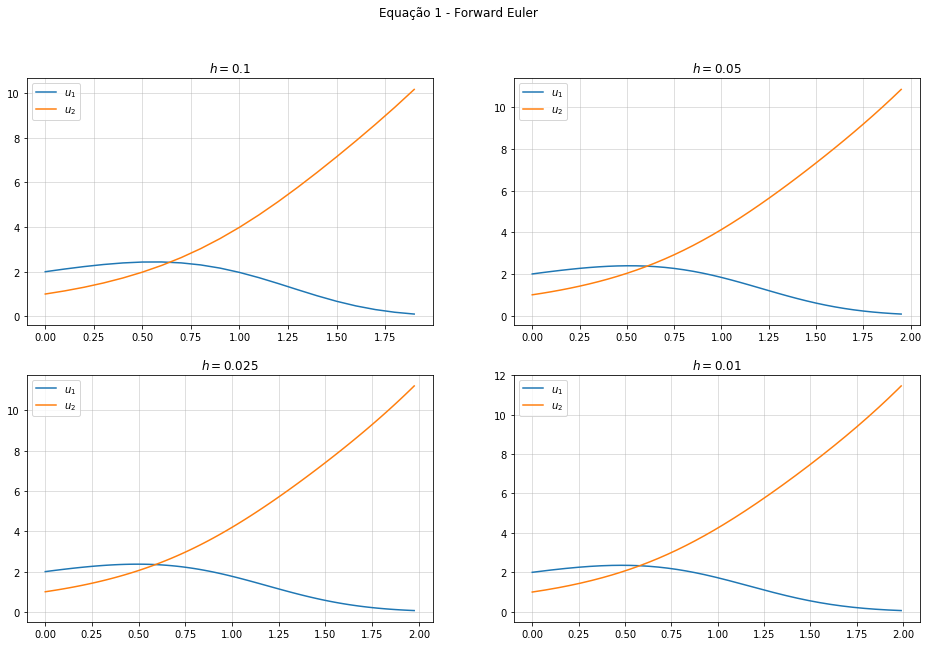

In [13]:
u0 = [2,1]

hs = [0.1,0.05,0.025,0.01]
ts = [np.arange(0,2,h) for h in hs]

ys = []
for t in ts:
    ys.append(f_euler(dif_eq, u0, t))
    
sol = rk_4(dif_eq, u0, np.arange(0,2,0.001))
    
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (16,10))
fig.suptitle('Equação 1 - Forward Euler')
axes = [ax1, ax2, ax3, ax4]
for (a, y, t, h) in zip(axes, ys, ts, hs):
    a.plot(t, y)
    a.set_title('$h = ' + str(h) + '$')
    a.grid(alpha = 0.5)
    a.legend(['$u_1$','$u_2$'])
plt.show()

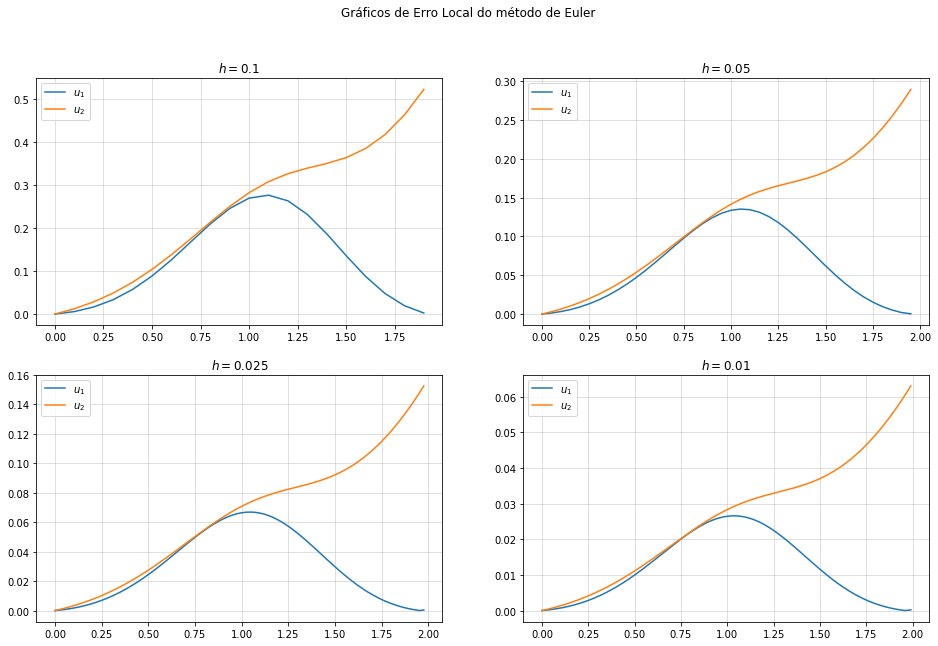

In [14]:
err = []
err_p = []
for i in range(len(ts)):
    err.append(np.linalg.norm(abs(sol[-1]-ys[i][-1]))) # erro global
    err_p.append(abs(ys_rk[i] - ys[i])) # erro local

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (16,10))
fig.suptitle('Gráficos de Erro Local do método de Euler')
axes = [ax1, ax2, ax3, ax4]
for (a, e, t, h) in zip(axes, err_p, ts, hs):
    a.plot(t, e)
    a.set_title('$h = ' + str(h) + '$')
    a.grid(alpha = 0.5)
    a.legend(['$u_1$','$u_2$'])
plt.show()

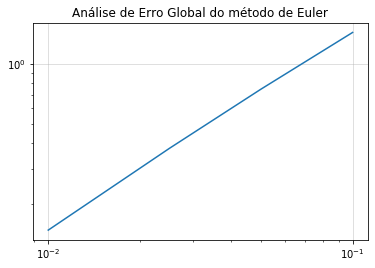

In [15]:
plt.title('Análise de Erro Global do método de Euler')
plt.grid(alpha = 0.5)
plt.loglog(hs, err)
plt.show()